#                  **********************ARILINE PASSENGER SATISFACTION***************

# About Dataset


# Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? i have predict passenger satisfaction.

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

nflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral) 

# EDA (exploratory data analysis)



In [1]:
# Importing Necessary Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore")

In [3]:
# Importing Both Datasets Using Pandas Library

In [4]:
df_train=pd.read_csv(r"train.csv")
df_test=pd.read_csv(r"test.csv")

In [69]:
df_train.tail(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103890,80087,0,0,56,0,2,550,3,5,5,...,3,3,3,3,4,3,3,0,0.0,1
103894,86549,1,0,26,0,0,712,4,4,4,...,5,3,4,4,3,4,5,17,26.0,1
103895,66030,0,1,24,0,1,1055,1,1,1,...,1,3,3,5,5,4,1,13,10.0,0
103897,102203,0,0,60,0,0,1599,5,5,5,...,4,4,4,4,4,4,4,9,7.0,1
103898,60666,1,0,50,1,1,1620,3,1,3,...,2,4,3,4,2,4,2,0,0.0,0
103899,94171,0,1,23,0,1,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,1,0,49,0,0,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,1,1,30,0,0,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,0,1,22,0,1,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0
103903,62567,1,0,27,0,0,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,0


In [68]:
df_test.tail(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25966,30263,1,1,42,0,1,1024,4,4,4,...,3,3,1,2,2,3,3,0,17.0,0
25967,90347,0,1,39,0,0,404,1,1,1,...,2,5,3,4,4,4,2,0,0.0,0
25968,86816,1,0,41,0,1,692,2,2,2,...,2,2,3,3,2,3,2,15,3.0,0
25969,120654,1,0,52,0,0,280,3,3,3,...,4,4,4,4,3,4,3,0,0.0,1
25970,25309,0,1,36,0,1,432,1,5,1,...,4,5,2,5,2,3,4,0,0.0,0
25971,78463,1,1,34,0,0,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,71167,1,0,23,0,0,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,37675,0,0,17,1,1,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,0
25974,90086,1,0,14,0,0,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1
25975,34799,0,0,42,1,1,264,2,5,2,...,1,1,2,1,1,1,1,0,0.0,0


In [6]:
# Dropping The First Two Column In Both Datasets As It Is Unnamed And Seems To Be Index 

In [7]:
df_train.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
# Overview Of The Dataset

In [9]:
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
df_train.shape

(103904, 24)

In [11]:
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [12]:
df_test.shape

(25976, 24)

In [13]:
# Columns In The Dataset

In [14]:
df_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [15]:
# Data Types Of All The Features In Dataset

In [16]:
df_train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [17]:
# As Satisfaction Is Our Target Tariable Let's See Type Of Satisfaction Present In Your Dataset

In [18]:
df_train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

# Finding null value.

In [20]:
df_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

So We Can See That There Is Null Vlaue Present In "Arrival Delay in Minutes - 310" Columns 
Which We Can Fill It With The Help Of Mean Method.

In [21]:
df_train["Arrival Delay in Minutes"]=df_train["Arrival Delay in Minutes"].fillna(np.mean(df_train["Arrival Delay in Minutes"]))

In [22]:
df_train.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

So as we can see know there is no nullvalue present in dataset 

# Duplicate value

In [23]:
df_train.duplicated().sum()

0

No duplicated value present in this dataset

In [24]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [25]:
# Get the Categorical  columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Print the Categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [26]:
# For Every Categorical Feature Let's Print Unique Values Availble In That Columns.

In [27]:
for i in df_train.columns:
    print(i,"---------",df_train[i].unique(),"-----",df_train[i].nunique())

id --------- [ 70172   5047 110028 ...  68825  54173  62567] ----- 103904
Gender --------- ['Male' 'Female'] ----- 2
Customer Type --------- ['Loyal Customer' 'disloyal Customer'] ----- 2
Age --------- [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78] ----- 75
Type of Travel --------- ['Personal Travel' 'Business travel'] ----- 2
Class --------- ['Eco Plus' 'Business' 'Eco'] ----- 3
Flight Distance --------- [ 460  235 1142 ...  974 1479  400] ----- 3802
Inflight wifi service --------- [3 2 4 1 5 0] ----- 6
Departure/Arrival time convenient --------- [4 2 5 3 1 0] ----- 6
Ease of Online booking --------- [3 2 5 4 1 0] ----- 6
Gate location --------- [1 3 2 5 4 0] ----- 6
Food and drink --------- [5 1 2 4 3 0] ----- 6
Online boarding --------- [3 5 2 1 4 0] ----- 6
Seat comfort --------- [5 1 2 3 4 0] ----- 6


satisfaction --------- ['neutral or dissatisfied' 'satisfied'] ----- 2


In [28]:
for i in df_train.columns:
    if df_train[i].dtype=='object':
        print(i)
        print(df_train[i].unique(),"\n")

Gender
['Male' 'Female'] 

Customer Type
['Loyal Customer' 'disloyal Customer'] 

Type of Travel
['Personal Travel' 'Business travel'] 

Class
['Eco Plus' 'Business' 'Eco'] 

satisfaction
['neutral or dissatisfied' 'satisfied'] 



In [29]:
# Get the numerical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Print the numerical columns
print("Numerical Columns:")
print(numerical_columns)


Numerical Columns:
Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


# Identify outliers and remove if any

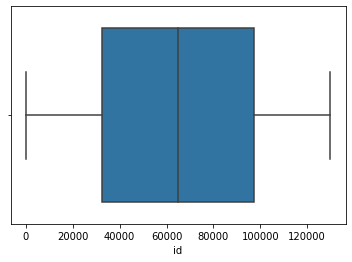

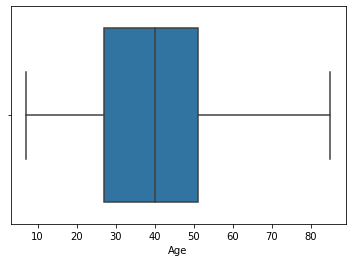

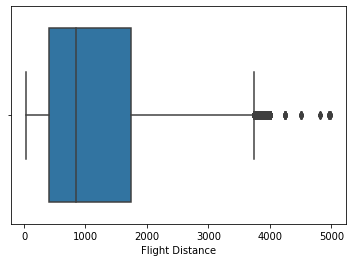

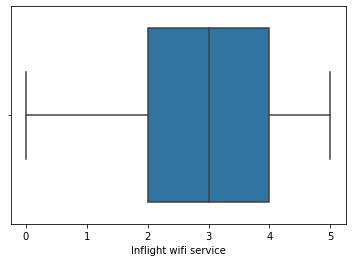

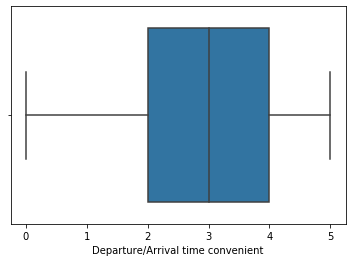

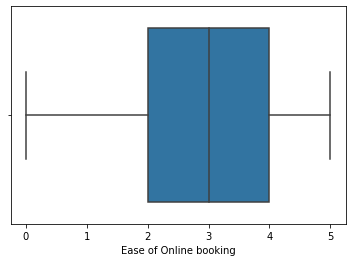

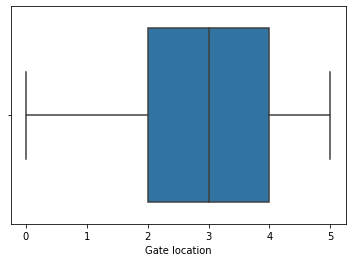

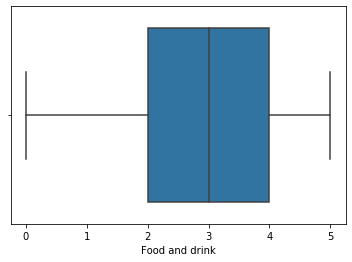

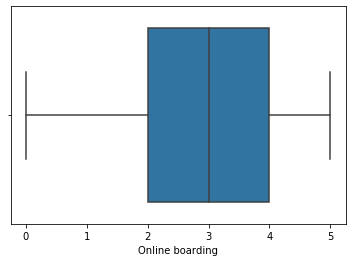

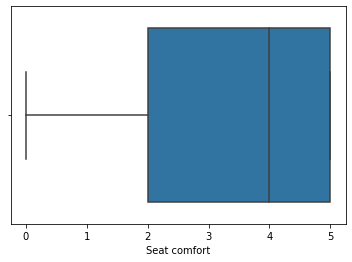

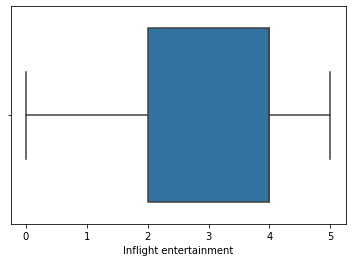

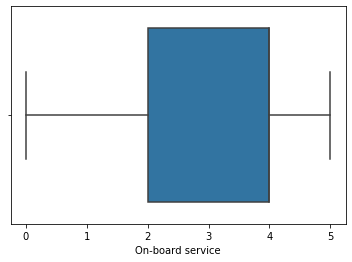

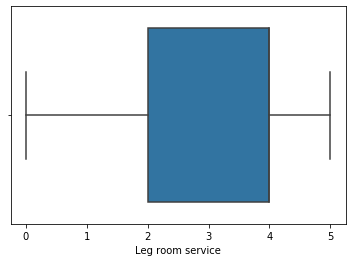

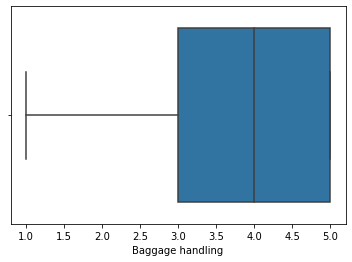

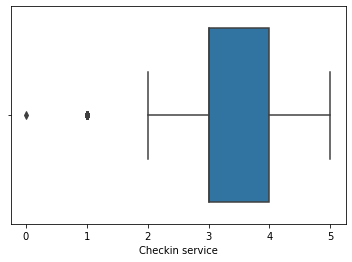

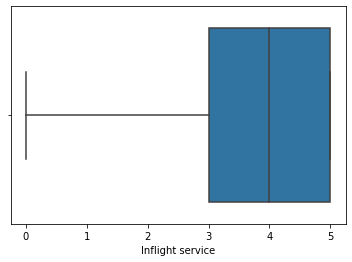

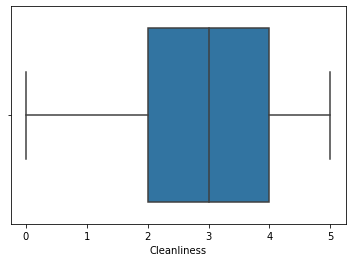

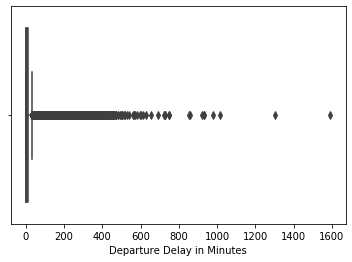

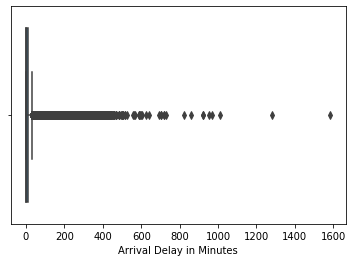

In [30]:
for i in numerical_columns:
    # Outlier Detection - Box plot
    sns.boxplot(x=i, data=df_train)
    plt.show()

In [31]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                   64834.5
Age                                     24.0
Flight Distance                       1329.0
Inflight wifi service                    2.0
Departure/Arrival time convenient        2.0
Ease of Online booking                   2.0
Gate location                            2.0
Food and drink                           2.0
Online boarding                          2.0
Seat comfort                             3.0
Inflight entertainment                   2.0
On-board service                         2.0
Leg room service                         2.0
Baggage handling                         2.0
Checkin service                          1.0
Inflight service                         2.0
Cleanliness                              2.0
Departure Delay in Minutes              12.0
Arrival Delay in Minutes                13.0
dtype: float64


In [32]:
# Removing outliers from dataset
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_train.shape

(74931, 24)

# Data Visualization

In [33]:
# Get the Categorical  columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Print the numerical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


#As this are the categorical columns in the dataset. This is the visualization of all the categorical columns with the help of bar plot method.

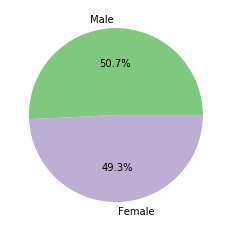

In [34]:
plt.pie(df_train['Gender'].value_counts(), labels=["Male", "Female"],colors = sns.color_palette("Accent") + sns.color_palette("Dark2"), autopct='%1.1f%%')
plt.show()

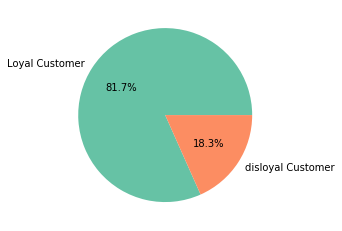

In [35]:
plt.pie(df_train['Customer Type'].value_counts(), labels=["Loyal Customer", "disloyal Customer"],colors = sns.color_palette("Set2") + sns.color_palette("Paired"), autopct='%1.1f%%')
plt.show()


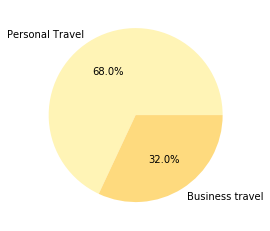

In [36]:
plt.pie(df_train['Type of Travel'].value_counts(), labels=["Personal Travel", "Business travel"], colors=sns.color_palette("YlOrBr"), autopct='%1.1f%%')
plt.show()


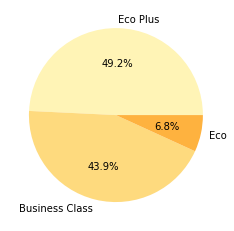

In [37]:
plt.pie(df_train.Class.value_counts(), labels = ["Eco Plus", "Business Class", "Eco"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

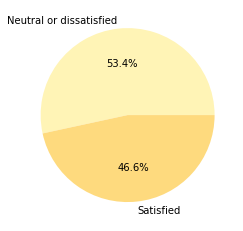

In [38]:
plt.pie(df_train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

# Data Visualization of numerical values from dataset


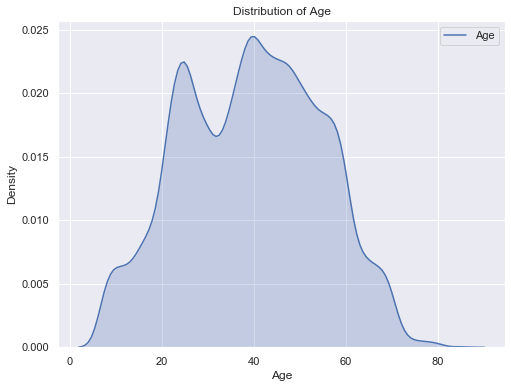

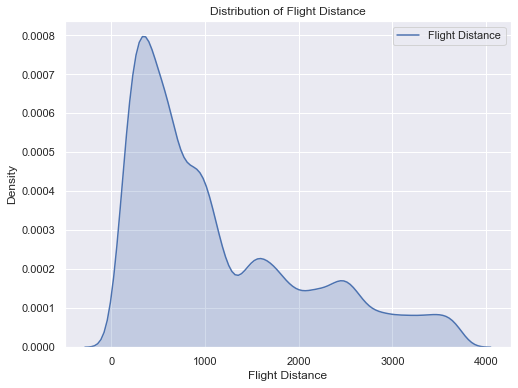

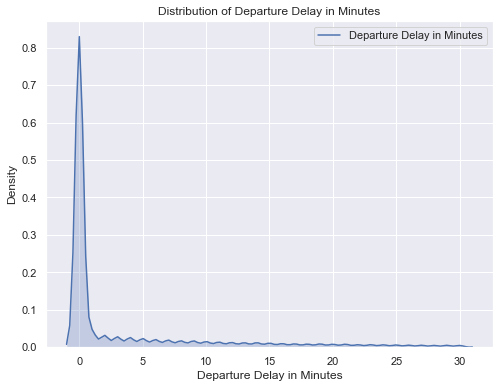

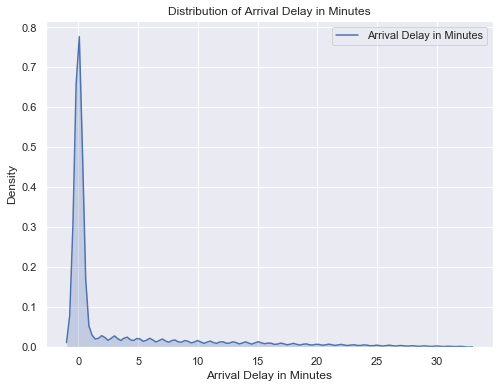

In [62]:
# Assuming df_train is your DataFrame
numeric_columns_to_visualize = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]  # Include only the variables you want

numeric_df = df_train[numeric_columns_to_visualize]  # Select specific numerical columns

# Loop through each selected numerical column and create KDE plots
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    sns.kdeplot(data=numeric_df[column], shade=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


Consider visualizing variables like "Age," "Flight Distance," "Departure Delay in Minutes," and "Arrival Delay in Minutes" as they are likely to be relevant for understanding the factors that influence passenger satisfaction.

# Label Encoding of Categorical Variables

In [41]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df_train[col] = lencoders[col].fit_transform(df_train[col])

In [42]:
lencoders_t = {}
for col in df_test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    df_test[col] = lencoders_t[col].fit_transform(df_test[col])


In [43]:
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,111157,0,0,26,1,1,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,0
6,82113,1,0,47,1,1,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,0


In [44]:
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,0,52,0,1,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,0,0,36,0,0,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,1,1,20,0,1,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,1,0,44,0,0,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,0,0,49,0,1,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1


# Finding Correlation among Features

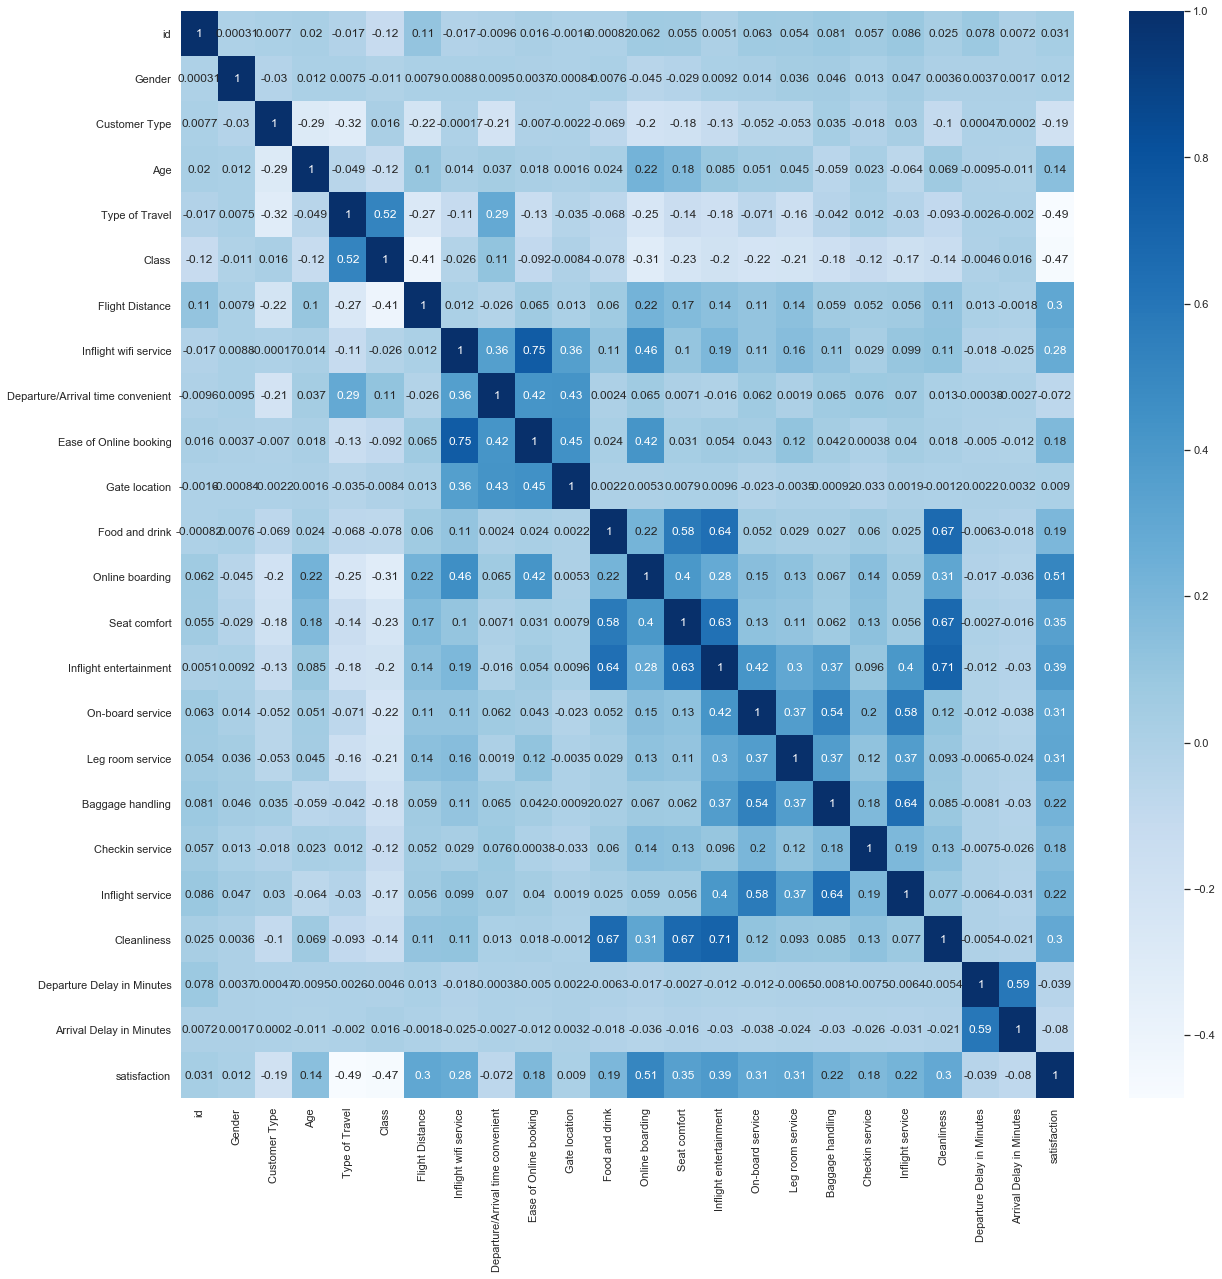

In [64]:
sns.set(rc={'figure.figsize':(20,20)})

cor_df = df_train.corr()

sns.heatmap(cor_df, annot = True, cmap = 'Blues')
plt.show()

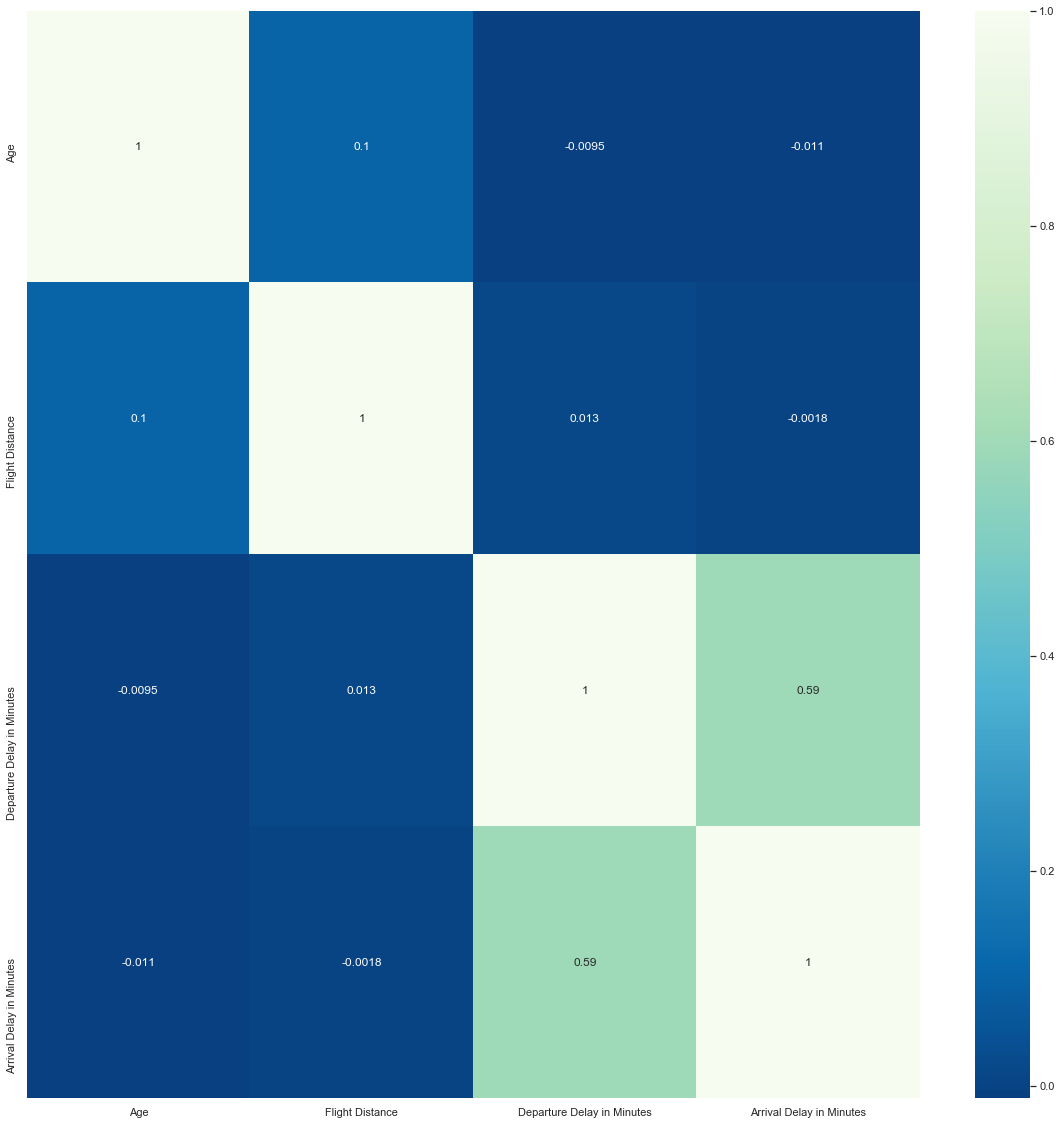

In [63]:
sns.set(rc={'figure.figsize':(20,20)})

cor_df = numeric_df.corr()

sns.heatmap(cor_df, annot = True, cmap = 'GnBu_r')
plt.show()

# Top 10 Feature Selection through Chi-Square¶

In [79]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df_train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(df_train), columns=df_train.columns)
modified_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.540280,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.847150,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,0.918532,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.855843,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,0.632219,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [81]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df_test)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(df_test), columns=df_test.columns)
modified_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.150462,0.0,0.0,0.576923,0.0,0.5,0.026050,1.0,0.8,0.6,...,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1.0
1,0.693193,0.0,0.0,0.371795,0.0,0.0,0.571890,0.2,0.2,0.6,...,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0
2,0.095049,1.0,1.0,0.166667,0.0,0.5,0.032512,0.4,0.0,0.4,...,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0
3,0.600200,1.0,0.0,0.474359,0.0,0.0,0.675687,0.0,0.0,0.0,...,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1.0
4,0.283829,0.0,0.0,0.538462,0.0,0.5,0.232431,0.4,0.6,0.8,...,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1.0


In [48]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Leg room service', 'Cleanliness'],
      dtype='object')


These are top 10 features impacting on passenger satisfaction

# Building Models

In [49]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [50]:
features = ['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Leg room service', 'Cleanliness']
target = ['satisfaction']

X = df_train[features]
y = df_train[target]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Standardize numerical features using StandardScaler
numeric_features = ['Flight Distance']
preprocessor = ColumnTransformer([('scaler', StandardScaler(), numeric_features)],
                                 remainder='passthrough')
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#This code showes that numerical feature "Flight Distance" will be standardized in both the training and test datasets. #Standardization involves subtracting the mean and dividing by the standard deviation, resulting in a feature with a mean of 0 and a standard deviation of 1.
#This used to normalize the range of features and make them more comparable or suitable for certain machine learning algorithms.

In [52]:
# SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_predictions)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)

#The steps collectively train the SVM model, make predictions on the test data, evaluate the model's accuracy, generate a confusion matrix, and compute the ROC curve and ROC AUC score for performance evaluation.

In [53]:
# Print the results
print("SVM Accuracy:", svm_accuracy)
print("SVM Confusion Matrix:\n", svm_confusion_matrix)
print("SVM ROC AUC:", svm_roc_auc)

SVM Accuracy: 0.9363448321878962
SVM Confusion Matrix:
 [[7679  396]
 [ 558 6354]]
SVM ROC AUC: 0.9351152928276574


#This examine the performance of the SVM model. The accuracy provides a measure of how well the model predicted the correct labels. The confusion matrix gives detailed information about the true positive, true negative, false positive, and false negative predictions. Finally, the ROC AUC score represents the overall performance of the model in distinguishing between positive and negative classes.

In [54]:
# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predictions)


print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", lr_confusion_matrix)
print("Logistic Regression ROC AUC:", lr_roc_auc)

Logistic Regression Accuracy: 0.8637485821044906
Logistic Regression Confusion Matrix:
 [[7134  941]
 [1101 5811]]
Logistic Regression ROC AUC: 0.8620896489078088


In [55]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_predictions)

print("KNN Accuracy:", knn_accuracy)
print("KNN Confusion Matrix:\n", knn_confusion_matrix)
print("KNN ROC AUC:", knn_roc_auc)

KNN Accuracy: 0.9314739440848736
KNN Confusion Matrix:
 [[7681  394]
 [ 633 6279]]
KNN ROC AUC: 0.9298137846147232


In [56]:
# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_predictions)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)
print("Decision Tree ROC AUC:", dt_roc_auc)

Decision Tree Accuracy: 0.9244011476613064
Decision Tree Confusion Matrix:
 [[7519  556]
 [ 577 6335]]
Decision Tree ROC AUC: 0.9238337507883271


In [57]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)
print("Random Forest ROC AUC:", rf_roc_auc)

Random Forest Accuracy: 0.9343430973510376
Random Forest Confusion Matrix:
 [[7656  419]
 [ 565 6347]]
Random Forest ROC AUC: 0.9331847784801055


In [58]:
# Create a dictionary to store the accuracy of each model
accuracy_scores = {
    'SVM': svm_accuracy,
    'Logistic Regression': lr_accuracy,
    'KNN': knn_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy
}

# Find the best model based on accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

# Print the best model and its accuracy
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)


Best Model: SVM
Best Accuracy: 0.9363448321878962


In [59]:
df_train.shape

(74931, 24)

# df_test dataset

In [70]:
# Replace df_train with df_test
X = df_test[features]
y = df_test[target]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features using StandardScaler
numeric_features = ['Flight Distance']
preprocessor = ColumnTransformer([('scaler', StandardScaler(), numeric_features)],
                                 remainder='passthrough')
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [71]:
# SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_predictions)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)

# Print the results
print("SVM Accuracy:", svm_accuracy)
print("SVM Confusion Matrix:\n", svm_confusion_matrix)
print("SVM ROC AUC:", svm_roc_auc)


SVM Accuracy: 0.9278290993071594
SVM Confusion Matrix:
 [[2774  171]
 [ 204 2047]]
SVM ROC AUC: 0.9256545477995443


In [72]:
# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", lr_confusion_matrix)
print("Logistic Regression ROC AUC:", lr_roc_auc)

Logistic Regression Accuracy: 0.8504618937644342
Logistic Regression Confusion Matrix:
 [[2565  380]
 [ 397 1854]]
Logistic Regression ROC AUC: 0.8473008412031928


In [73]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_predictions)

print("KNN Accuracy:", knn_accuracy)
print("KNN Confusion Matrix:\n", knn_confusion_matrix)
print("KNN ROC AUC:", knn_roc_auc)


KNN Accuracy: 0.9220554272517321
KNN Confusion Matrix:
 [[2794  151]
 [ 254 1997]]
KNN ROC AUC: 0.9179439585047657


In [74]:
# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_predictions)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)
print("Decision Tree ROC AUC:", dt_roc_auc)



Decision Tree Accuracy: 0.9130100076982294
Decision Tree Confusion Matrix:
 [[2717  228]
 [ 224 2027]]
Decision Tree ROC AUC: 0.9115346584313783


In [75]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)
print("Random Forest ROC AUC:", rf_roc_auc)


Random Forest Accuracy: 0.9311008468052347
Random Forest Confusion Matrix:
 [[2786  159]
 [ 199 2052]]
Random Forest ROC AUC: 0.928802516746


In [76]:
# Create a dictionary to store the accuracy of each model
accuracy_scores = {
    'SVM': svm_accuracy,
    'Logistic Regression': lr_accuracy,
    'KNN': knn_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy
}

# Find the best model based on accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

# Print the best model and its accuracy
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: Random Forest
Best Accuracy: 0.9311008468052347


In [77]:
df_test.shape

(25976, 24)